PREDICTION OF SYRIATEL COMPANY CUSTOMER CHURN


Author: ELIZABETH NYAMBURA

Github url:https://github.com/elizabethnyambura/dsc-phase-3-project-v2-3.git

Business Understanding
Due to increased competition in the telecommunication industry, there has been concerns on predicting the customer churn in order to retain customers. In order to maintain competitive parity by SyriaTel company, customer retention is a key to the business. Since retaining customers will be cheaper than acquiring new ones it is therefore paramount to deduce ways of making sure customers are not lost by the SyriaTel company. By analyzing various data points and using predictive analytics, SyriaTel company will identify patterns and indicators that help them anticipate customer behavior and take proactive measures to reduce churn rates. Therefore SyriaTel is seeking to models that will predict whether customers are likely to churn or not hence taking a proactive measures to retain them.data on demographics like location and usage patterns like calls, charge etc will be used to analyze and build predictive machine learning models, hence SeriaTel must continuously adapt its models to reflect changing customer behavior and market dynamics to ensure its retention strategies remain effective.

Objectives


*   Create machine learning models that can predict customer churn by using data
    to analyze customer features.

*   Comparing the build machine learning models and determine the most accurate model in prediction.

*  The analysis aims to identify the specific features that have a significant impact on the customer churn rate in SyriaTel, provide valuable recommendations based on the   
   findings hence help to mitigate churn rates in the company and improve customer retention.







In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv("/content/bigml_59c28831336c6604c800002a.csv")

In [ ]:
df.shape

(3333, 21)

In [ ]:
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [ ]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


DATA CLEANING

In [ ]:
#CHECKING FOR MISSING VALUES

In [ ]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [ ]:
#From the above information,the data does not have missing values

In [ ]:
df.duplicated().sum()

0

In [ ]:
#the data have no duplicate values

In [ ]:
#Determine and drop values that do not affect the data

In [ ]:
#The phone number, area code and account length collumns do not have  effect on customer churn and therefore we drop them.


In [ ]:
columns_to_drop = ['account length', 'phone number', 'area code']
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   international plan      3333 non-null   object 
 2   voice mail plan         3333 non-null   object 
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

# Exploratory Data Analysis

In [ ]:
#separating categorical and numerical colums for easier analysis
numerical_df = df[['number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']]
categorical_df = [['state', 'churn', 'international plan', 'voice mail plan']]

In [ ]:
df.describe()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
# Countplot of churn feature
import seaborn as sns
print(df.churn.value_counts())


False    2850
True      483
Name: churn, dtype: int64


# Categorical Features Analysis

Churn will be used as the dependent variable in the analysis.

From the above analysis, False indicats loyal customers who are still using the company,s products while True indicates te customers who terminated their contract with the company.

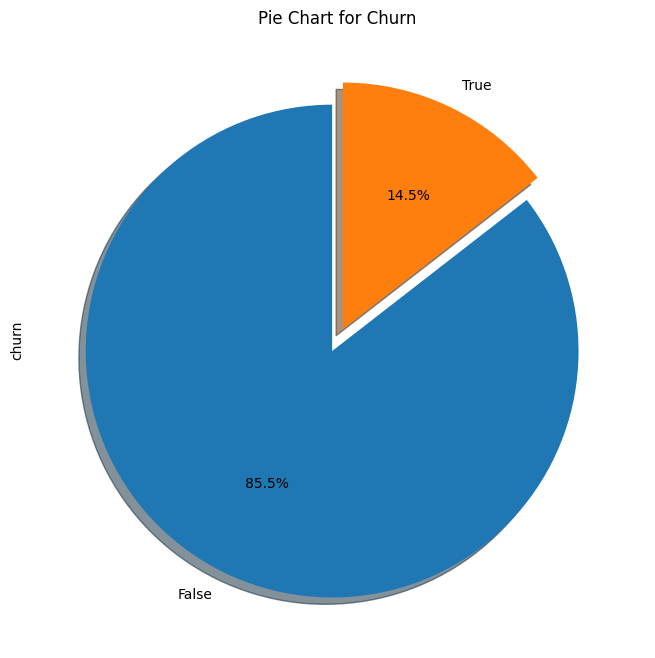

In [ ]:
import matplotlib.pyplot as plt
# To get a pie chart to analyze 'Churn'
df['churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%', startangle=90, shadow=True, figsize=(8,8))
plt.title('Pie Chart for Churn')
plt.show()

From the above pie chart,14.5% of customers terminated their contract with the company while 85.5% of the customers continued using the company's products.

# Visualization of relationships in columns

In [ ]:
# determining the total calls made by state
df['total_calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls']
df.groupby('state')['total_calls'].sum().sort_values(ascending=False)

state
WV    32523
MN    25807
NY    25092
AL    24070
OH    24060
WY    23751
OR    23497
VA    23483
WI    23463
ID    22722
MI    22657
CT    22492
VT    22146
TX    22144
IN    22096
UT    21761
KS    21426
NC    21172
NJ    20970
MD    20868
MT    20377
WA    20084
NV    20023
MS    19911
FL    19797
AZ    19671
MA    19602
RI    19525
CO    19434
ND    19394
MO    19348
NM    19278
ME    19075
OK    18930
NE    18718
SC    18397
DE    18392
KY    17971
IL    17752
SD    17517
GA    17087
AR    16705
NH    16585
DC    16401
HI    16188
TN    16102
LA    15523
AK    15288
PA    13637
IA    13528
CA    10582
Name: total_calls, dtype: int64

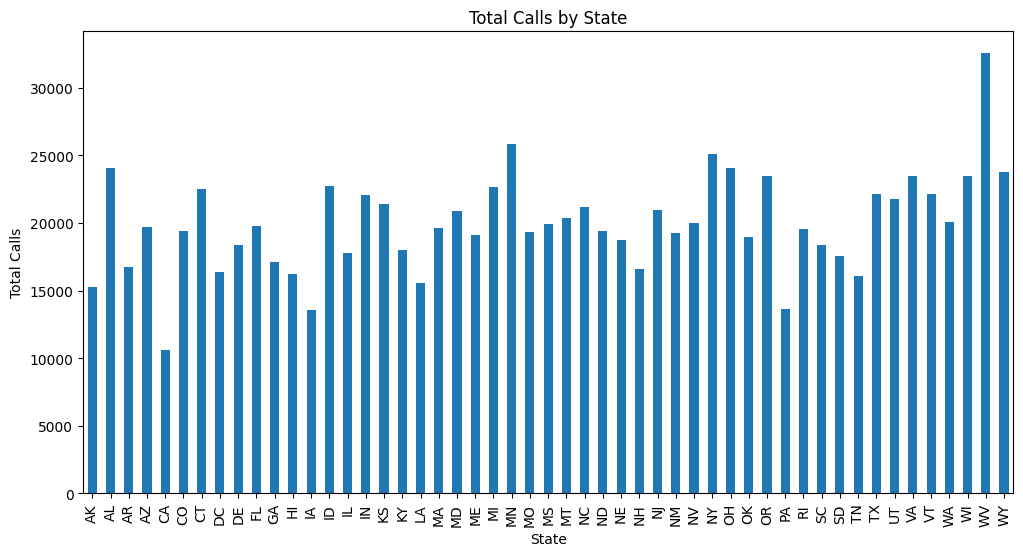

In [ ]:
#visualization of total calls per state
df.groupby('state')['total_calls'].sum().plot(kind='bar', figsize=(12, 6), rot=90)

# Add labels and title to the plot
plt.title('Total Calls by State')
plt.xlabel('State')
plt.ylabel('Total Calls')

# Display the plot
plt.show()

### The above chart indicates that West (WV) state has the highest number of total calls while (CA) has the least number of total calls

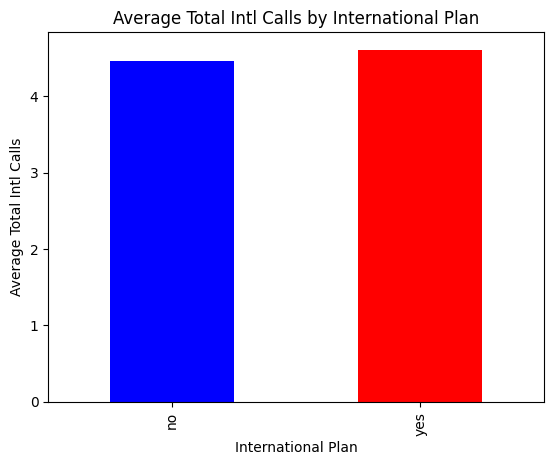

In [ ]:
#visualizing for the international calls made
# Group by 'international plan' and calculate the mean of 'total intl calls'
grouped_data = df.groupby('international plan')['total intl calls'].mean()

# Plot the bar plot
fig, ax = plt.subplots()
grouped_data.plot(kind='bar', color=['blue', 'red'], ax=ax)

# Add labels and title to the plot
ax.set_xlabel('International Plan')
ax.set_ylabel('Average Total Intl Calls')
ax.set_title('Average Total Intl Calls by International Plan')

# Display the plot
plt.show()

The bar graph indicates that there is little variation among people making international calls concerning their choice of an international plan.
On average, the number of international calls remains nearly consistent, regardless of whether individuals opt for an international plan or not.

<Axes: xlabel='count', ylabel='customer service calls'>

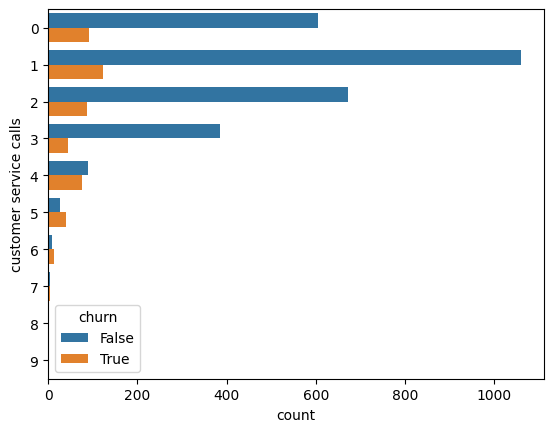

In [ ]:
#visualizing the relationship between the number of calls to the call center and loyalty

sns.countplot(y='customer service calls', hue='churn', data=df) #using searbon to plot the countplot

The chart provided illustrates the connection between the frequency of calls to the call center and customer loyalty. The data on the chart reveals a significant correlation between the number of calls and loyalty. Specifically, it suggests that a substantial portion of individuals who engage in these calls are loyal to Syriatel, resulting in a lower likelihood of them switching to another service provider.

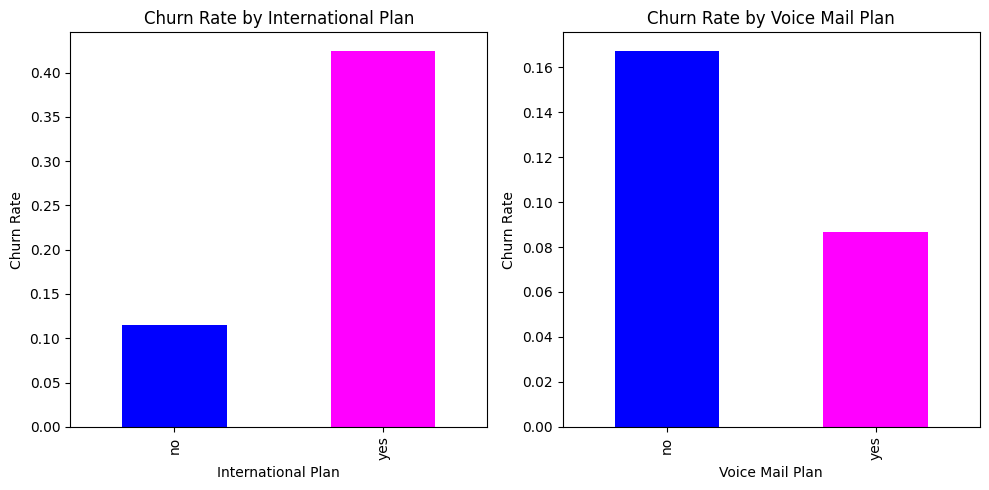

In [ ]:
#visualization of churn rate given the international plan and the voice mail plan
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first subplot: International Plan
df.groupby('international plan')['churn'].mean().plot(kind='bar', ax=axes[0], color=['blue', 'magenta'])
axes[0].set_xlabel('International Plan')
axes[0].set_ylabel('Churn Rate')
axes[0].set_title('Churn Rate by International Plan')

# Plot the second subplot: Voice Mail Plan
df.groupby('voice mail plan')['churn'].mean().plot(kind='bar', ax=axes[1], color=['blue', 'magenta'])
axes[1].set_xlabel('Voice Mail Plan')
axes[1].set_ylabel('Churn Rate')
axes[1].set_title('Churn Rate by Voice Mail Plan')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

 The ghraphs above indicates that Voice Mail plan subscribers exhibit higher customer loyalty, primarily attributed to their lower churn rate. Conversely, customers who have subscribed to the international plan display a higher churn rate, indicating a greater probability of switching from Syriatel.

These findings suggest that customers express greater satisfaction with the Voice Mail plan compared to the international plan.

## Numerical Features Analysis

<ipython-input-24-8d9966d108e3>:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


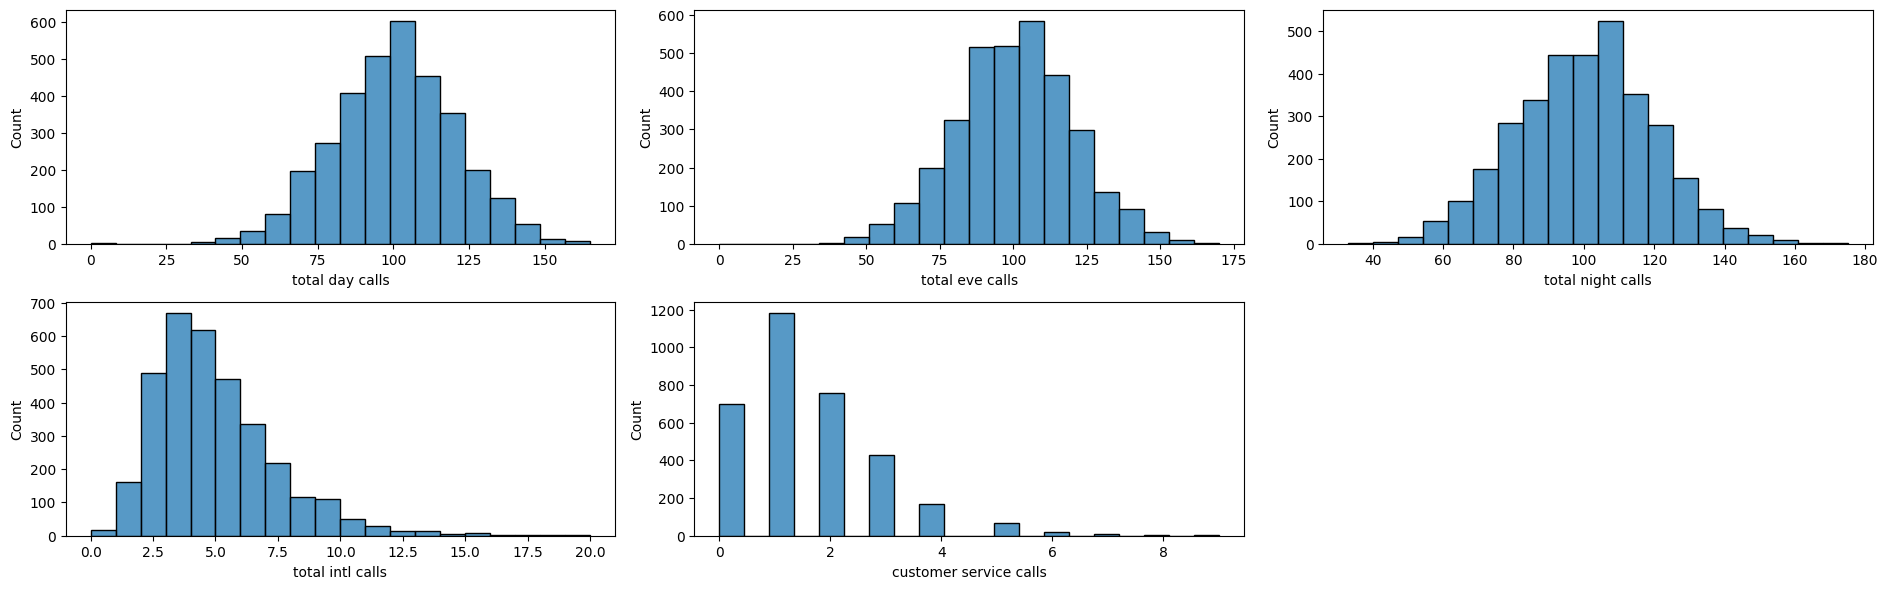

In [ ]:
#visualization of calls distribution
f, ax = plt.subplots(2, 3, figsize=(19, 6), constrained_layout=True)

sns.histplot(df["total day calls"], bins=20, ax=ax[0, 0])
sns.histplot(df["total eve calls"], bins=20, ax=ax[0, 1])
sns.histplot(df["total night calls"], bins=20, ax=ax[0, 2])
sns.histplot(df["total intl calls"], bins=20, ax=ax[1, 0])
sns.histplot(df["customer service calls"], bins=20, ax=ax[1, 1])

# Remove the extra subplot
f.delaxes(ax[1, 2])

# Adjust the spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()

Regarding the distribution plots of the mentioned features, it is observed that all features exhibit a normal distribution, with the exception of customer service calls. Total international calls display a slight right skew, although it still maintains a relatively normal distribution.

Customer service calls, on the other hand, exhibit multiple peaks, indicating the presence of several modes within the population. This observation is logical since customer service calls are discrete integers and not continuous float numbers.

## Outliers

In [ ]:
#checking for outliers
def detect_outliers(data):
# Calculating the quartiles and IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
# determining the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
# identifying outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

In [ ]:
#checking for outliers using the function
detect_outliers(numerical_df).sum()

number vmail messages       51.00
total day minutes         3928.20
total day calls           1807.00
total day charge           667.81
total eve minutes         4175.90
total eve calls           1836.00
total eve charge           354.95
total night minutes       6180.80
total night calls         2647.00
total night charge         278.13
total intl minutes         286.60
total intl calls          1001.00
total intl charge           91.57
customer service calls    1223.00
dtype: float64

In [ ]:
#removing outliers

In [ ]:
def remove_outliers(data):
    # Calculating the quartiles and IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Determining the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Removing outliers
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]

    return filtered_data

In [ ]:
#using the function above to remove outliers
filtered_data = remove_outliers(numerical_df)

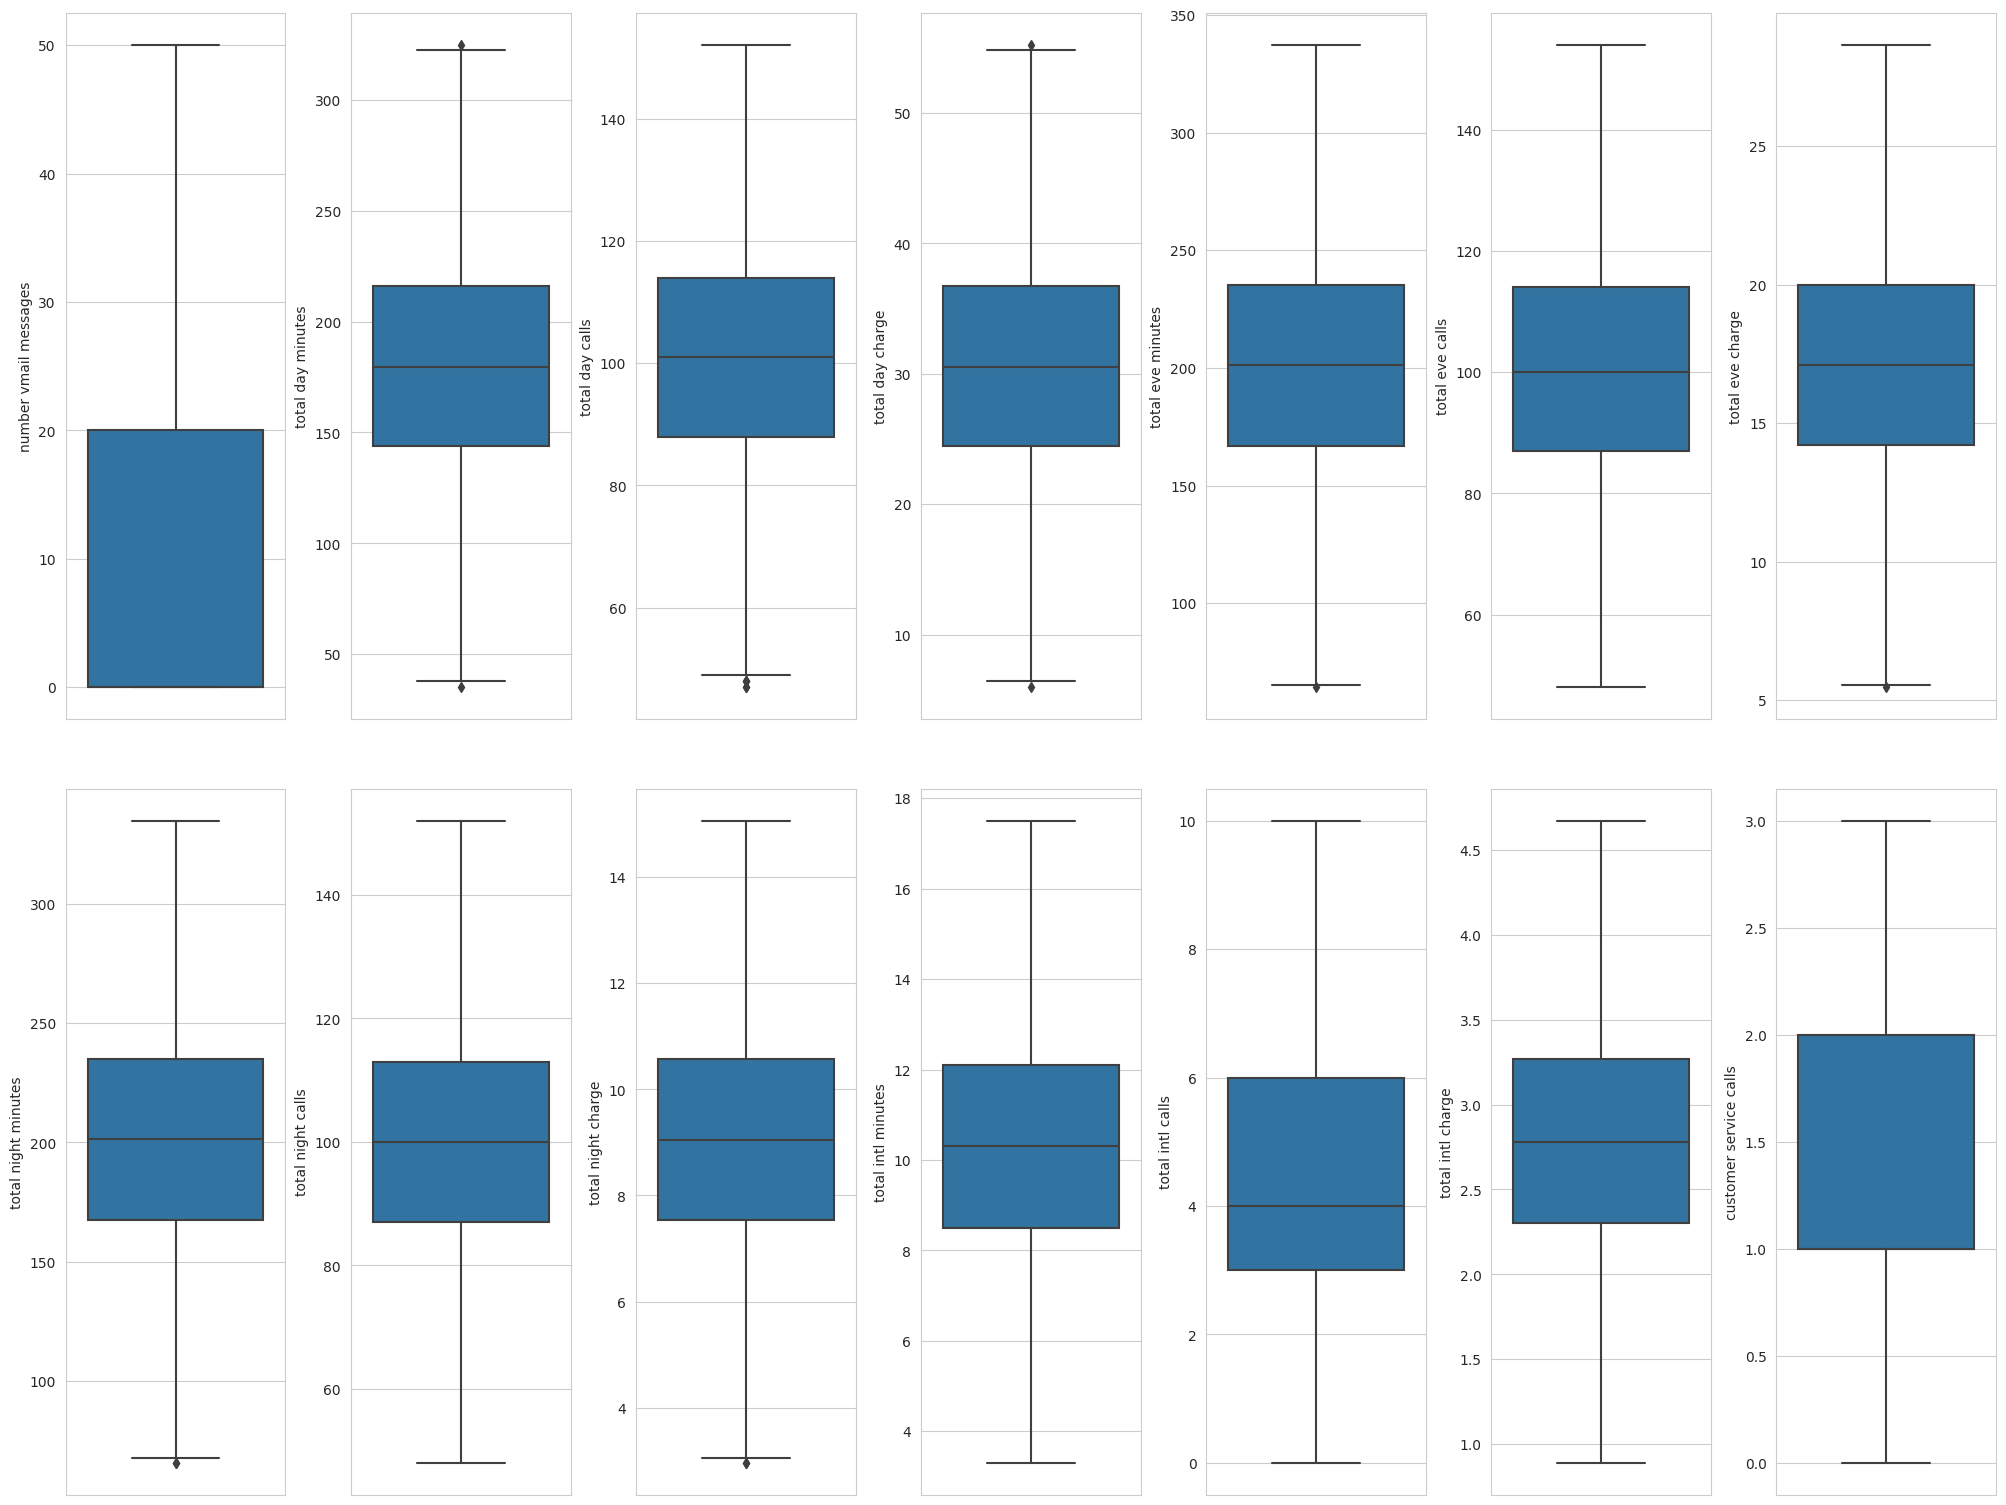

In [ ]:
#checking for any outliers in the dataset using box plot
# visualizing with matplotlib and seaborn
sns.set_style('whitegrid')
fig,ax = plt.subplots(ncols=7,nrows =2,figsize = (20,15))
index = 0
ax = ax.flatten()
for col,value in filtered_data.items():
    sns.boxplot(y = col,data = filtered_data,ax = ax[index])
    index += 1
plt.tight_layout(pad= 0.5,w_pad= 0.7,h_pad=5.0);

After exploring the dataset it is paramount to do modelling for futher data analysis

In [ ]:
#we now Select the most important feactures to use for the data modelling

# We will use heatmap to check the correlation existing between variables in order to select the  best features for modelling

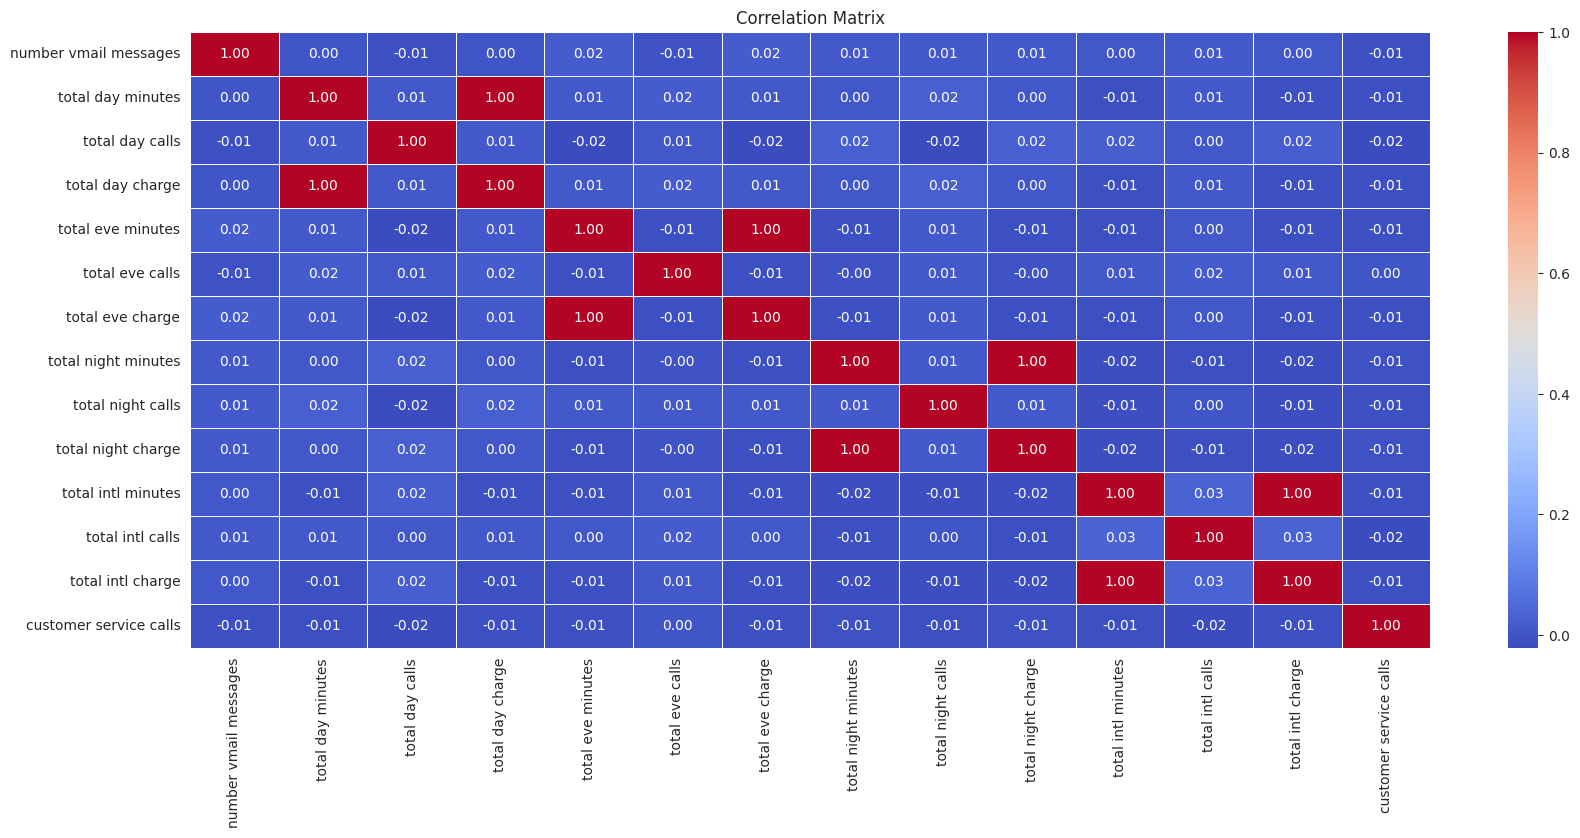

In [ ]:
#using heatmap to check for correlation
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

From the above heatmap,some variables exhibit a correlation coefficient of 1, indicating a perfect correlation with other variables,thereby making them redundant for certain analyses.
Highly correlated variables potentially cause instability thus producing unreliable estimates for the model parameters.Therefore we remove the highly correlated variables

In [ ]:
#droping features with perfect correlation using our previous seriatel_df
df1 = df.drop(columns=['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes'],axis=1)

In [ ]:
#checking current data shape
df1.shape

(3333, 15)

In [ ]:
#The remaining 15 columns are suitable for analysis and will therefore be used for modelling

Transforming categorical variables using One Hot Encoding

In [ ]:
# Transforming categorical data using OHE

# Select the categorical columns to be one-hot encoded
categorical_columns = ['international plan', 'voice mail plan', 'state']

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(df1[categorical_columns])

# Use the get_feature_names_out method to get the feature names
feature_names = encoder.get_feature_names_out(input_features=categorical_columns)

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=feature_names)

# Concatenate the encoded DataFrame with the remaining columns from the original DataFrame
final_df = pd.concat([df1.drop(categorical_columns, axis=1), encoded_df], axis=1)

final_df

,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,25,110,45.07,99,16.78,91,11.01,3,2.70,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,114,41.38,110,10.30,104,7.32,5,3.29,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,71,50.90,88,5.26,89,8.86,7,1.78,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,113,28.34,122,12.61,121,8.41,3,2.73,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,36,77,26.55,126,18.32,83,12.56,6,2.67,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3329,0,57,39.29,55,13.04,123,8.61,4,2.59,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3330,0,109,30.74,58,24.55,91,8.64,6,3.81,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3331,0,105,36.35,84,13.57,137,6.26,10,1.35,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#convert churn using label ecoder using a function
def encode(column):
    le = LabelEncoder()
    final_df[column] = le.fit_transform(final_df[column])
#encoding the column
encode('churn')
#checking for encorded churn column
final_df.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

Modelling

In [ ]:
# Import the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score

In [ ]:
#defining variables
# dependent variable
X = final_df.drop('churn', axis=1)

# independent variable
y = final_df['churn']

X.head()

,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,25,110,45.07,99,16.78,91,11.01,3,2.70,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,114,41.38,110,10.30,104,7.32,5,3.29,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,71,50.90,88,5.26,89,8.86,7,1.78,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,113,28.34,122,12.61,121,8.41,3,2.73,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Train test split

THis will be used to test the data and to evaluate the performance of the trained model on unseen data. By evaluating the model on the test set, we can get an estimate of how well the model generalizes to new, unseen data.

In [ ]:
#using the standard scaler to standardize the data
# Split the data into features (X) and target variable (y)
X = final_df.drop(columns='churn', axis=1)
y = final_df['churn']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data preprocessing

Standardization:

To rescale the features of the dataset so as to have zero mean and unit variance.This will help in bringing all features to a similar scale.

In [ ]:
# Create an instance of StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

using SMOTE to remove class imbalance

In [ ]:
#SMOTE will help address the issue of class imbalance
from imblearn.over_sampling import SMOTE
# Creating a instance of SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE oversampling on the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

1.Building a baseline logistic regression model

In [ ]:
#Buiding a baseline model logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay, classification_report, accuracy_score, confusion_matrix
# Create an instance of Logistic Regression
logreg = LogisticRegression(solver='liblinear', random_state=42)

# Fit the model on the training data
logreg.fit(X_train_resampled, y_train_resampled)

# Predict on the training and testing data
y_train_pred = logreg.predict(X_train_resampled)
y_test_pred_1 = logreg.predict(X_test)

# Calculate accuracy on the training and testing data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred_1)

In [ ]:
#creating a function for checking for metrics
def evaluate_model_metrics(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)
    cm_display_train = ConfusionMatrixDisplay(confusion_matrix=cm_test).plot()
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Return results
    results = {
        'roc_auc_train': roc_auc_train,
        'roc_auc_test': roc_auc_test,
        'accuracy_train': accuracy_train,
        'accuracy_test': accuracy_test,
        'confusion_matrix_train': cm_display_train
    }
    return results

In [ ]:
#creating a function for checking for classification report
def generate_classification_report(y_true, y_pred):
    # Generate classification report with output_dict=True
    report_dict = classification_report(y_true, y_pred, output_dict=True)

    # Convert the report to a DataFrame
    report = pd.DataFrame(report_dict).transpose()

    return report

In [ ]:
# calling the function to get classifification report values
from sklearn.metrics import classification_report
logreg_report = generate_classification_report(y_test, y_test_pred_1)
logreg_report

,precision,recall,f1-score,support
0,0.880259,0.961131,0.918919,566.000000
1,0.551020,0.267327,0.360000,101.000000
accuracy,0.856072,0.856072,0.856072,0.856072
macro avg,0.715640,0.614229,0.639459,667.000000
weighted avg,0.830404,0.856072,0.834285,667.000000


**Precision**: The precision values for class 0 and class 1 are 0.88 and 0.55, respectively. A higher precision indicates that the model has a low rate of false positives for that class. Class 0 has a higher precision than class 1, suggesting that the model is better at predicting class 0 than class 1.

**Recall**: The recall values for class 0 and class 1 are 0.961 and 0.267, respectively. Recall represents the model's ability to correctly identify positive instances. Similar to precision, class 0 has a higher recall than class 1.

**F1-Score**: The F1-scores for class 0 and class 1 are 0.92 and 0.36, respectively. The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. Again, class 0 has a higher F1-score than class 1.

**Accuracy**: The accuracy of the model is 0.851, which indicates the proportion of correctly predicted instances out of the total number of instances.

Hence logistic regression has 85.6% prediction accuracy of test data

Based on these metrics, it appears that the model performs relatively better for class 0 compared to class 1







{'roc_auc_train': 0.8984238178633975,
 'roc_auc_test': 0.6142287373613686,
 'accuracy_train': 0.8984238178633975,
 'accuracy_test': 0.856071964017991,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7ee069be23b0>}

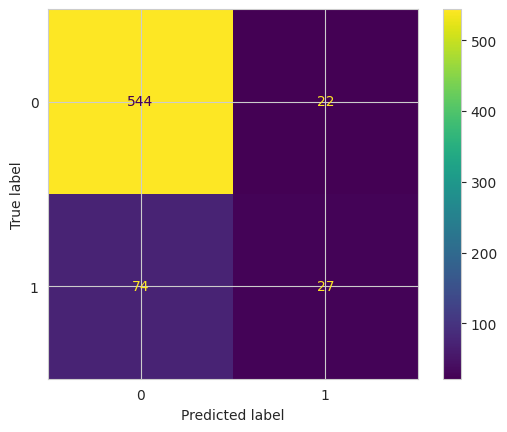

In [ ]:
#checking the metric of baseline model and draw confusion matrix using above function
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay, classification_report, accuracy_score, confusion_matrix,roc_curve

evaluate_model_metrics(logreg, X_train_resampled,y_train_resampled, X_test, y_test)

from above it can be seen that logistsic regression that roc_auc value on train data is 0.8984238178633975 and train data is 0.6142287373613686 this means that model has relatively high level of discrimination between classes on the training data than testing data
Confusion matrix is used to display the predicted and true labels of logistic regression model where the True positives 27, False negative 74, True Negative 544 and False positive 22
In summary, the model achieves a training accuracy of approximately 89.8% and a testing accuracy of around 85.6%. This indicates that the model performs relatively well in predicting the class labels for both the training and testing datasets.
It can be seen that the model is not much accurate in making prediction from the matrix and there is some overfit

Cross validation score to improve model performance and reduce overfit

In [ ]:
# Create an instance of Logistic Regression with cross-validation
from sklearn.linear_model import LogisticRegressionCV
logreg_final = LogisticRegressionCV(Cs=10, cv=5, solver='liblinear')

# Fit the model on the resampled training data
logreg_final.fit(X_train_resampled, y_train_resampled)

# Predict on the resampled training and testing data
y_train_pred = logreg.predict(X_train_resampled)
y_test_pred = logreg.predict(X_test)

# Calculate accuracy on the resampled training and testing data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

{'roc_auc_train': 0.8977670753064798,
 'roc_auc_test': 0.60574467340727,
 'accuracy_train': 0.8977670753064798,
 'accuracy_test': 0.848575712143928,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7ee06bc30160>}

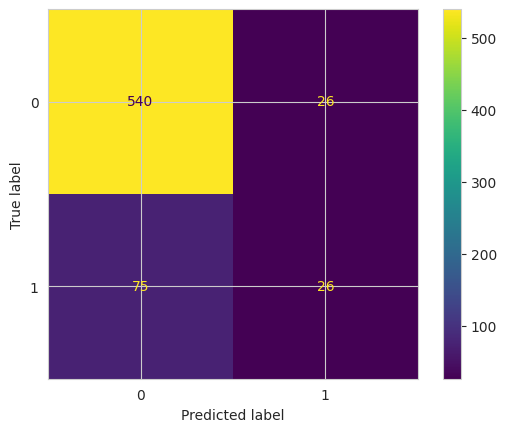

In [ ]:
evaluate_model_metrics(logreg_final,X_train_resampled,y_train_resampled,X_test,y_test)

It can be seen that after using cross validation and picking 5 folds we get an improved model with accuracy mean of 0.848575712143928 which represents 84.8% accuracy level in prediction customer churn in test data. in training data it dropped to 0.8977670753064798
This adjusted model demonstrates no reasonable change in level of performance, correctly predicting the class labels for the majority of instances in both the training and testing datasets.
The testing accuracy is slightly lower than the training accuracy, which is expected but not with a significant difference.
Therefore  we can proceed the second model to check its perfomance in predicting customer churn and check if its a good perfomer than logistic regresion

2.Decison Trees classifier model

In [ ]:
# Create an instance of DecisionTreeClassifier with regularization parameters
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=5)

# Fit the model on the training data
dt_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the training and testing data
y_train_pred_2= dt_clf.predict(X_train_resampled)
y_test_pred_2 = dt_clf.predict(X_test)

# Calculate accuracy on the training and testing data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred_2)

{'roc_auc_train': 0.8861646234676007,
 'roc_auc_test': 0.861587307140608,
 'accuracy_train': 0.8861646234676007,
 'accuracy_test': 0.9100449775112444,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7ee06bedec80>}

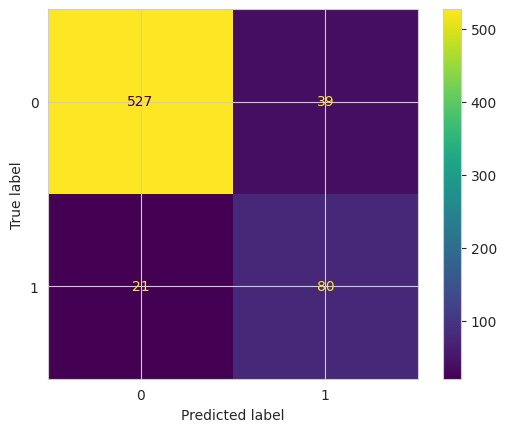

In [ ]:
#checking for decison tree metrics using the predefiend function
evaluate_model_metrics(dt_clf, X_train_resampled, y_train_resampled, X_test, y_test)

roc_auc_train: It measures the model's ability to distinguish between the two classes (positive and negative) in the training data. A value of 0.886 indicates that the model performs well in classifying the training instances.

roc_auc_test:It measures the model's ability to generalize its predictions to unseen data. A value of 0.862 suggests that the model maintains a good level of performance on the testing data, indicating that it is not overfitting.

accuracy_train: It represents the proportion of correctly classified instances in the training set. A value of 0.886 indicates that the model achieves a high level of accuracy on the training data.

accuracy_test: A value of 0.911 suggests that the model performs very well on the testing data, indicating that it generalizes well and is not overfitting.

From the confusion matrix it can be seen that TP 80, TN 528, FP 38 and FN 21, hence there is improved prediction here
To get futher insights we will check the classification report of all the metrics related to Decison Tree classifier

In [ ]:
#using predefined function to check for classification report
dt_clf_report = generate_classification_report(y_test, y_test_pred_2)
dt_clf_report

,precision,recall,f1-score,support
0,0.961749,0.932862,0.947085,566.000000
1,0.677966,0.792079,0.730594,101.000000
accuracy,0.911544,0.911544,0.911544,0.911544
macro avg,0.819857,0.862471,0.838839,667.000000
weighted avg,0.918777,0.911544,0.914303,667.000000


Precision: In class 0, the precision is 0.962, indicating that 96.2% of the instances predicted as class 0 are actually true negatives. In class 1, the precision is 0.672, meaning that 67.2% of the instances predicted as class 1 are true positives.

Recall: In class 0, the recall is 0.931, indicating that 93.1% of the actual class 0 instances are correctly identified as true negatives. In class 1, the recall is 0.79, meaning that 79% of the actual class 1 instances are correctly identified as true positives.

F1-score: In class 0, the F1-score is 0.946, indicating a good balance between precision and recall for class 0. In class 1, the F1-score is 0.727, suggesting a slightly lower balance between precision and recall for class 1.

Accuracy: Accuracy is the overall proportion of correctly classified instances. In this case, the accuracy is 0.910, meaning that the model correctly predicts the class labels.

Macro avg: Macro average calculates the average metrics (precision, recall, F1-score) for both classes, giving equal weight to each class which are 0.816974, 0.861587 and 0.836706 while Weighted avg calculates the average metrics, taking into account the support (number of instances) for each class. It provides a weighted average based on the number of instances in each class which are 0.917855, 0.910045 and 0.912998

3.Random forest model

In [ ]:
# Create a random forest classifier with regularization parameters
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=5, max_features='sqrt', random_state=42)

# Fit the model on the selected training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the training and testing sets
y_train_pred_3 = rf_classifier.predict(X_train_resampled)
y_test_pred_3 = rf_classifier.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred_3)

{'roc_auc_train': 0.8684325744308232,
 'roc_auc_test': 0.8020151838505404,
 'accuracy_train': 0.8684325744308231,
 'accuracy_test': 0.8710644677661169,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7ee06c371ae0>}

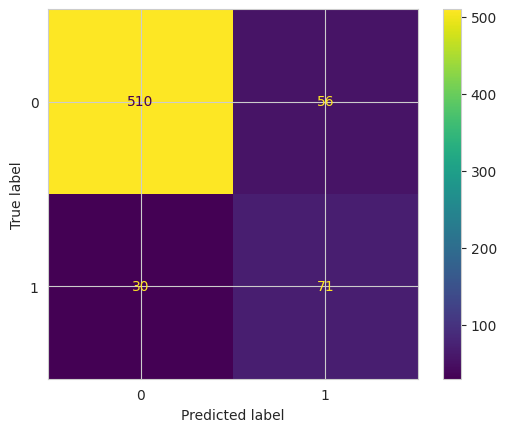

In [ ]:
#checking for random forest metrics using the predefiend function
evaluate_model_metrics(rf_classifier, X_train_resampled, y_train_resampled, X_test, y_test)


Random Forest classifier achieves an accuracy of approximately 86.8% on the training data and 87.1% on the testing data. It shows good performance in distinguishing between the positive and negative classes, with an area under the ROC curve (AUC) of 0.86 on the training data and 0.80 on the testing data. Overall, the model performs well and demonstrates a high level of accuracy in predicting the target variable.
The confusion matrix TP is 71, TN is 510, FP is 56 and FN is 30
This accuracy is slightly lower than the one for Decison tree classifier

In [ ]:
generate_classification_report(y_test, y_test_pred_3)

,precision,recall,f1-score,support
0,0.944444,0.901060,0.922242,566.000000
1,0.559055,0.702970,0.622807,101.000000
accuracy,0.871064,0.871064,0.871064,0.871064
macro avg,0.751750,0.802015,0.772525,667.000000
weighted avg,0.886087,0.871064,0.876901,667.000000


For class 0 (negative class):

Precision: 94.4% indicates that when the model predicts the negative class, it is correct 94.4% of the time.
Recall: 90.1% means that the model correctly identifies 90.1% of the actual negative instances.
F1-score: 92.2% is a balanced measure of precision and recall, combining both metrics into a single value.
Support: 566 instances of the negative class are present in the dataset.

For class 1 (positive class):

Precision: 55.9% indicates that when the model predicts the positive class, it is correct 55.9% of the time.
Recall: 70.29% means that the model correctly identifies 70.29% of the actual positive instances.
F1-score: 62.2% is a balanced measure of precision and recall for the positive class.
Support: 101 instances of the positive class are present in the dataset.
The overall accuracy of the Random forest classifier is approximately 87.1%, indicating the percentage of correctly predicted instances overall.

summary
Based on the three models it can be seen that logistic regression perfoms poorly in making predictions of customer churn.
Random forest clasifier and Decision trees perform pretty well.

Hence it is relevant to improve the random forest clasifier and Decision trees due to their higher predictability using hyperparatemeters to achieve the best accuracy.

Hyperparameter is the perfect tool for increasing efficiency and perfomance of models.

Hyperparameter Tuning
Hyperparameters are parameters that are not learned from the data but are set prior to training the model.
They control aspects such as model complexity, regularization, learning rate, and number of iterations.
Since our best model from the above 3 is Random forest clasifier we will use this Gridsearch to improve its perfomance

1. Random Forest

In [ ]:
# Create an instance of the Random Forest classifier
rf = RandomForestClassifier( random_state=42)

# Define the parameter grid for grid search
rf_param_grid = {
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters found during the grid search
best_params = grid_search.best_params_

# Create a new Random Forest classifier with the best hyperparameters
best_model = RandomForestClassifier(**best_params, random_state=42)

# Fit the best model to the resampled training data
best_model.fit(X_train_resampled, y_train_resampled)

# Predict on the training data
y_train_pred = best_model.predict(X_train_resampled)

# Predict on the test data
y_test_pred = best_model.predict(X_test)

# Compute the accuracy
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

{'roc_auc_train': 0.930385288966725,
 'roc_auc_test': 0.8453188958471819,
 'accuracy_train': 0.930385288966725,
 'accuracy_test': 0.9100449775112444,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7ee05bef3e50>}

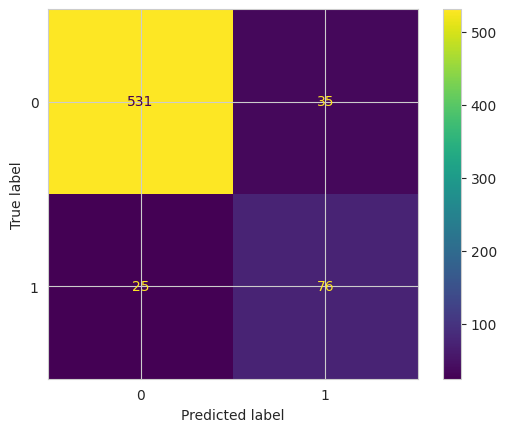

In [ ]:
#using the function above the draw confusion matrix
evaluate_model_metrics(best_model, X_train_resampled, y_train_resampled, X_test, y_test)

After tuning the parameters for the random forest classifier using grid search our model improved on its perfomance as explained below
The accuracy of the random forest model is now at 91.0% on testing data, which indicates that the model correctly predicted the class labels for the test data with an accuracy of approximately 93.0% on the training data,hence perfect for predicting customer churn.
The confusion matrix in tuned parameter represents TP as 76, TN as 531, FP as 35 and FN 25 which is best in making prediction

2. Decision Tree Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for grid search
dt_param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create an instance of DecisionTreeClassifier
dt_clf_final= DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_clf_final, param_grid=dt_param_grid, cv=5)

# Fit the grid search to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters found during the grid search
best_params = grid_search.best_params_

# Create a new DecisionTreeClassifier with the best hyperparameters
best_model_2 = DecisionTreeClassifier(**best_params)

# Fit the best model to the resampled training data
best_model_2.fit(X_train_resampled, y_train_resampled)

# Predict on the training and test data
y_train_pred = best_model_2.predict(X_train_resampled)
y_test_pred = best_model_2.predict(X_test)

# Calculate accuracy on the training and test data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

{'roc_auc_train': 0.917907180385289,
 'roc_auc_test': 0.8905730679074975,
 'accuracy_train': 0.917907180385289,
 'accuracy_test': 0.9385307346326837,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7e836cc28310>}

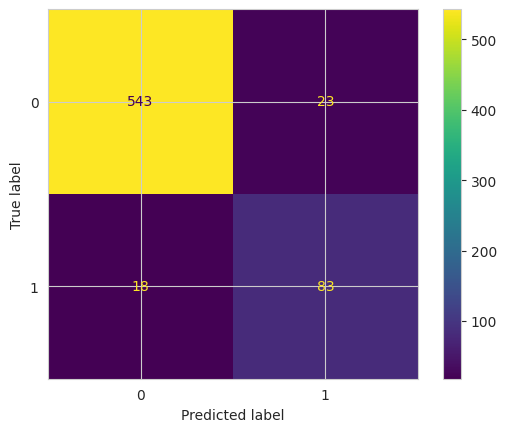

In [ ]:
evaluate_model_metrics(best_model_2, X_train_resampled, y_train_resampled, X_test, y_test)


The tuned decion tree model achieved accuracy dropped t0 91.7% on the training data increased to 93.8% on the test data. This indicates that the model is performing well and has learned patterns in the data that allow it to make accurate predictions.

Evaluation

1.Based on accuracy level

We have so far build three machine learning models to help us in predicting customer churn in Seriatel company. From the above, we have tested the accuracy of the three models and determined that logistic regression performs poorly having traning and testing rates of 89.8% and  85.6% respectively.Prediction of training data dropped to 89.7% while the testing data dropped  to 84.8% despite applying cross validation with 5 folds to reduce overfit.

We tried the other two model that is decision tree classifier and random forest which gave better accuracy. the decision tree training and testing accuracy is 88.6% and 91.1% respectively, while random forest training accuracy is 86.8% on training data and testing accuracy of 87.1%.

Hence it can be seen that decision tree had best prediction in average followed by random forest. In order to improve our prediction accuracy we hypertuned the models using gridsearch.

After the hyperparameter tuning decision tree model results improved to 91.7% acuracy on training data and 93.8% on testing data. Decision tree results improved to 93.0% on training data and 91.0% on testing data.

This shows that there was a little overfit in random forest model hence preffering decion trees. in terms of percision, recall and F1 score tuned decision tree performed better than random forest classifier.

2. Using ROC curve to check the best model

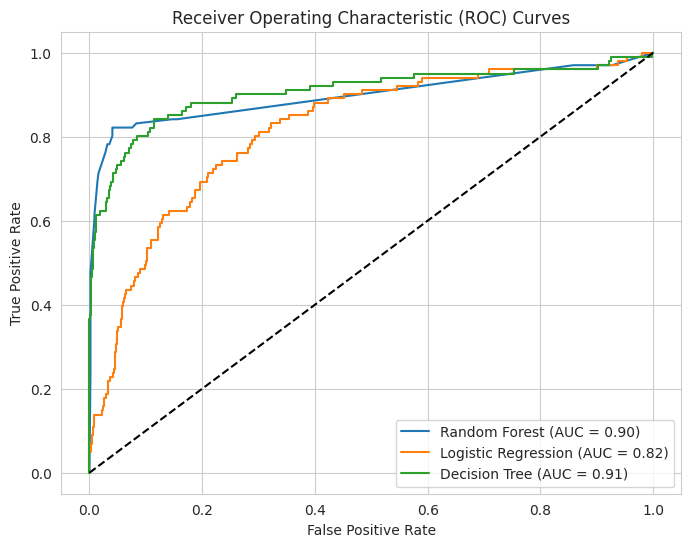

In [ ]:
#drawing ROC curve for the above three models

# Compute ROC curves and AUC scores for each model
models = [best_model_2, logreg_final, best_model]
labels = ['Random Forest', 'Logistic Regression', 'Decision Tree']

plt.figure(figsize=(8, 6))

for model, label in zip(models, labels):
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        y_probs = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(label, auc_score))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

Based on AUC curve we can deduce ths following:

Decision Tree has an AUC of 0.91:This indicates that the Random Forest model has good discriminatory power and is able to distinguish between the positive and negative classes effectively. It achieves a high TPR while maintaining a low FPR, resulting in a larger area under the ROC curve.

Random Forest has an AUC of 0.90: The Random Forest model also performs well but slighly lower than decion tree classifier. It has a good ability to classify the two classes correctly, but it may have slightly higher false positive and false negative rates compared to decion tree.

Logistic Regression has an AUC of 0.82: The Logistic Regression model performs the lowest among the three models in terms of discrimination. It may have a relatively higher false positive and false negative rates compared to the other models, resulting in a smaller area under the ROC curve.

Decision Tree has the largest area under the ROC curve followed by random forest, indicating the former has the best overall discriminatory power and performs better in distinguishing between the positive and negative classes.

Hence Decision Tree Classifier is best model for seriatel since it has largest area under the curve and also has highest accuracy in prediction of customer churn.

Conclusion

Therefore, from the above data analysis, Seriatel company will be able to achieve alot by using the Decision Tree Classifier model as follows:

Accurate Customer Churn Prediction: The high accuracy indicates that the model is effective in identifying customers who are likely to churn. This is valuable for Seriatel telecom company as it allows them to proactively take actions to retain those customers, potentially reducing customer attrition and its associated costs.

Cost Savings: By accurately predicting customer churn, Seriatel telecom company will focus its resources on targeted retention strategies, such as personalized offers, loyalty programs, or improved customer service, for customers identified as at risk. This targeted approach can lead to cost savings compared to deploying retention efforts to the entire customer base.

Customer Retention: The accurate prediction of customer churn enables the company to implement proactive measures to retain valuable customers. By intervening before customers churn, Seriatel telecom company has an opportunity to address their concerns, resolve issues, and provide incentives to encourage them to stay. This can contribute to maintaining a loyal customer base and potentially increasing customer satisfaction and loyalty.

Business Strategy and Decision-Making: Accurate churn prediction provides insights into customer behavior and patterns. This information can help the company better understand the factors that contribute to customer churn and make informed business decisions. It allows for data-driven strategies, such as product or service improvements, customer experience enhancements, or targeted marketing campaigns, aimed at reducing churn and improving customer retention.

Recommendations

* Continuous Model Optimization: Regularly fine-tune and optimize the decision tree model as new data becomes available. This will help maintain its accuracy and relevance over time.

* Benchmarking: Compare the performance of the decision tree model with industry benchmarks to gauge its effectiveness and competitiveness.

* Long-Term Strategy: Use the insights from the model to shape the company's long-term strategic direction, including network investments, product development, and customer service improvements.

* Customer Feedback Analysis: Leverage the model's predictive capabilities to analyze and act upon customer feedback more effectively.

* Segmentation: Use the model's insights to segment the customer base into different groups based on churn risk and behavior. This allows for tailored retention strategies for each segment.



Next Steps

* Regular Model Reevaluation: Periodically revisit the model's performance and consider retraining or updating it as necessary to adapt to changing market dynamics.

* Customer Retention Strategies: Develop and execute customer retention strategies based on the insights and predictions provided by the model. Tailor these strategies to address the specific needs and behaviors of at-risk customers.

* Training and Awareness: Educate and train relevant teams within the company on how to utilize the model's insights for better decision-making.

* Long-Term Strategy Development: Leverage the collected data and customer behavior insights to formulate long-term business strategies that align with customer needs and market trends.